In [2]:
import pandas as pd
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

root_dir = '/oak/stanford/groups/horence/rob/MERFISH_spatial_data'

sys.path.append(os.path.join(root_dir,'scripts'))
import spatial_utils
import plot_utils

In [4]:
spots = pd.read_csv(os.path.join(root_dir,'processed_data','all_passing_rna_spots.csv'))
spots.head()

,global_x,global_y,global_z,target_molecule_name,num_assigned_cells,cell_id,sample
0,-4237.7397,1681.8490,0.0,Acta2,1,217951229059897556843731256135790480948,mouse1sample2
1,-4183.0010,1688.5905,0.0,Acta2,1,281878279612082858224382179441472205807,mouse1sample2
2,-4215.4233,1699.2443,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
3,-4207.3945,1706.8620,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2
4,-4206.7200,1711.7010,0.0,Acta2,1,271699149458331512543397347819513343392,mouse1sample2


In [5]:
cells = pd.read_csv(os.path.join(root_dir,'processed_data','segmented_cell_shapes.csv'))
cells.head()

,cell_id,boundaryX,boundaryY,slice_id,sample
0,102513782275574352391549636869222584212,"2097.1362953431903, 2097.1362953431903, 2097.1...","2346.248493306339, 2345.705993324518, 2345.163...",mouse2_slice10,mouse2sample2
1,107041692196035477511188554607640157689,"2113.628294790536, 2113.519794794172, 2113.519...","2204.981498040259, 2204.5474980548024, 2204.00...",mouse2_slice10,mouse2sample2
2,110408674460711617898157940394920278916,"2033.8807974629103, 2033.8807974629103, 2033.7...","2221.1479974985123, 2220.6054975166917, 2220.1...",mouse2_slice10,mouse2sample2
3,125816213715504060865256572787204926854,"1962.813299844414, 1962.813299844414, 1962.813...","2167.765999287367, 2167.2234993055463, 2166.68...",mouse2_slice10,mouse2sample2
4,134881201666222369753036768466528484685,"2141.40429385975, 2141.40429385975, 2141.40429...","2170.47849919647, 2169.935999214649, 2169.3934...",mouse2_slice10,mouse2sample2


In [12]:
cell_subset_ids = spots['cell_id'].unique()[:10]

cells_subset = cells[cells['cell_id'].isin(cell_subset_ids)]
spots_subset = spots[spots['cell_id'].isin(cell_subset_ids)]
spots_subset.shape

(5876, 7)

In [13]:
import importlib
importlib.reload(spatial_utils)
centroid_dist_df = spatial_utils.spatial_zscore_centroid_dist(spots_subset, cells_subset)
centroid_dist_df.head()

,cell_id,target_molecule_name,num_cell_spots,mean_centroid_dist,z_score_centroid_dist
0,217951229059897556843731256135790480948,5730522E02Rik,1,8.354233,0.918991
1,217951229059897556843731256135790480948,Acta2,4,8.381264,0.925858
2,217951229059897556843731256135790480948,Adam2,1,8.259551,0.894941
3,217951229059897556843731256135790480948,Ano4,2,6.708137,0.500865
4,217951229059897556843731256135790480948,B4galnt3,1,6.718443,0.503483


In [14]:
import importlib
importlib.reload(spatial_utils)
polarity_df = spatial_utils.spatial_zscore_polarity(spots_subset, cells_subset)
polarity_df.head()

,cell_id,target_molecule_name,gene_centroidX,gene_centroidY,cell_centroidX,cell_centroidY,gene_centroid_dist,z_score_polarity
0,217951229059897556843731256135790480948,5730522E02Rik,-4230.533000,1681.186000,-4237.840307,1677.136744,8.354233,1.057027
1,217951229059897556843731256135790480948,Acta2,-4242.550825,1672.925575,-4237.840307,1677.136744,6.318459,0.638973
2,217951229059897556843731256135790480948,Adam2,-4230.939000,1681.674600,-4237.840307,1677.136744,8.259551,1.037584
3,217951229059897556843731256135790480948,Ano4,-4238.088150,1681.194950,-4237.840307,1677.136744,4.065767,0.176374
4,217951229059897556843731256135790480948,B4galnt3,-4231.980500,1680.423100,-4237.840307,1677.136744,6.718443,0.721111


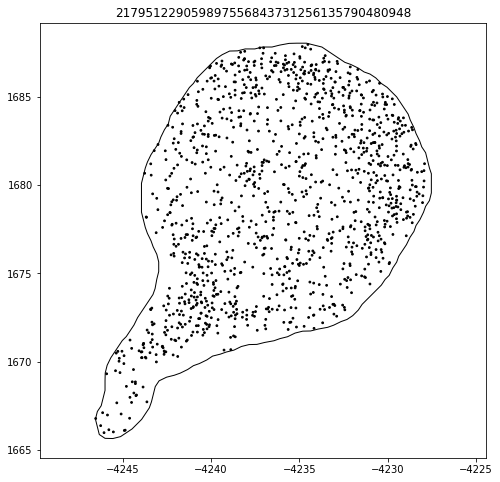

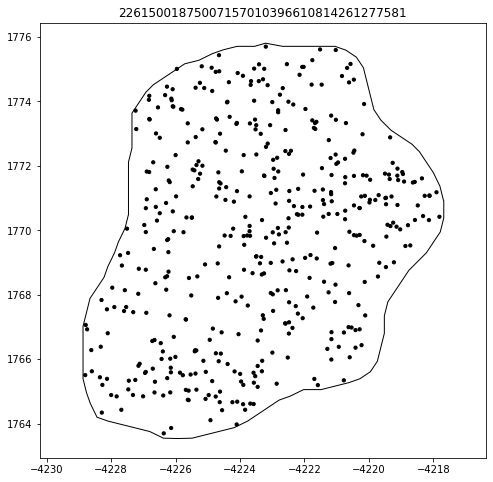

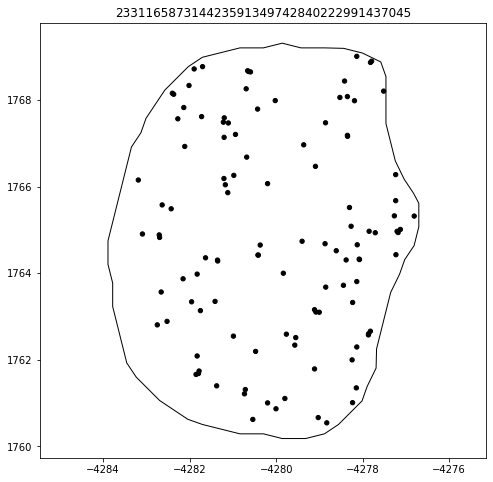

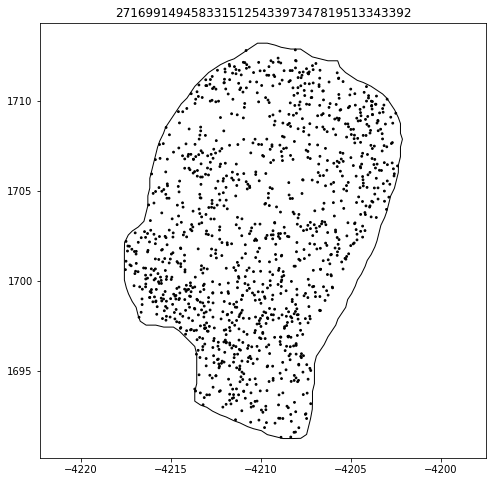

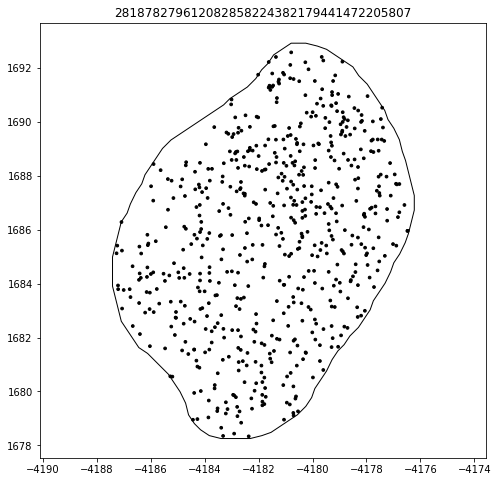

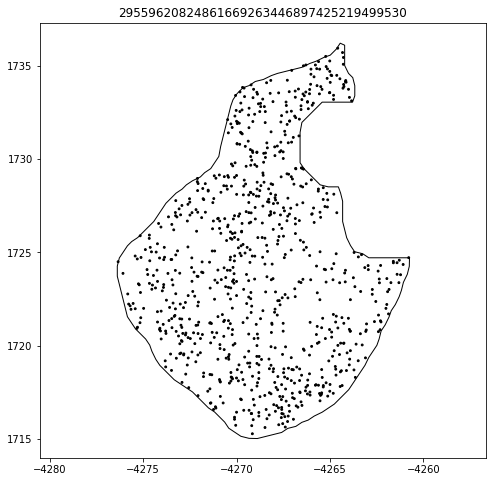

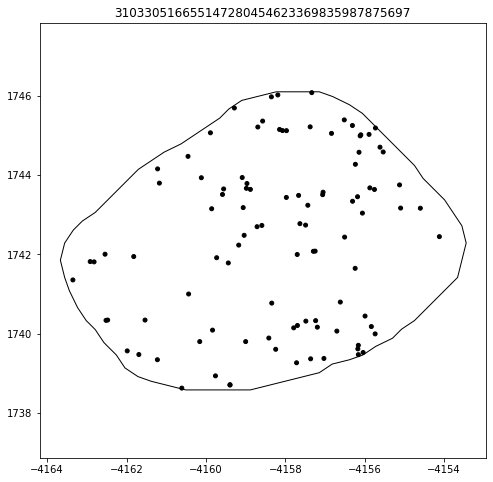

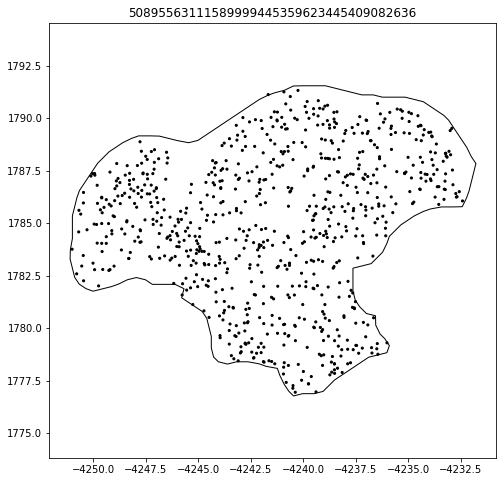

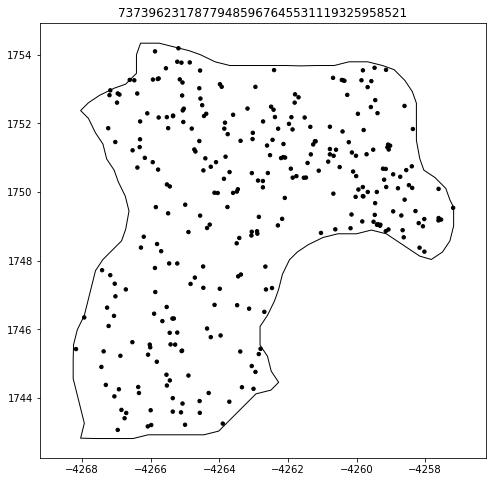

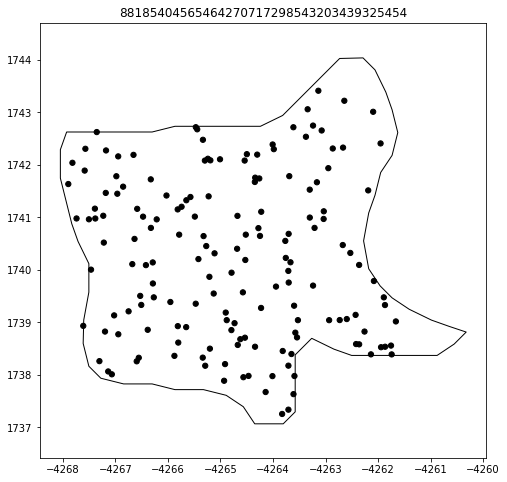

In [7]:
import importlib
importlib.reload(plot_utils)
plot_utils.plot_spot_cells(spots_subset, cells_subset)

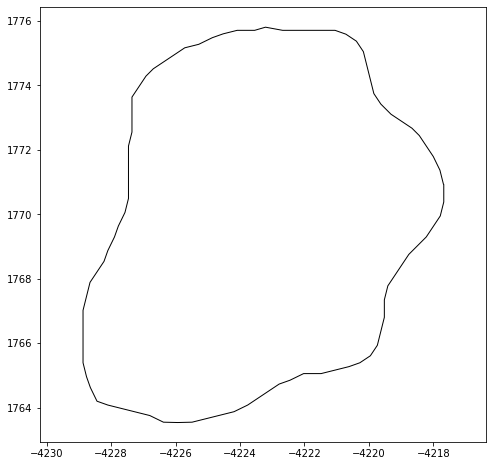

In [10]:
boundaryX = cells_subset.iloc[1]['boundaryX']
boundaryY = cells_subset.iloc[1]['boundaryY']
plot_utils._plot_cell(boundaryX, boundaryY)
plt.show()
plt.close()

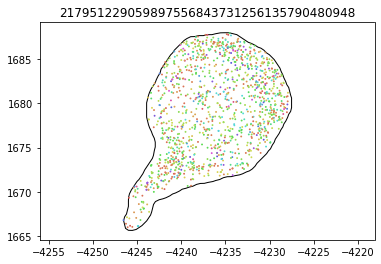

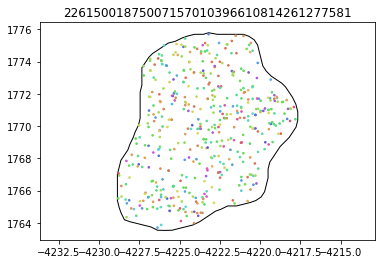

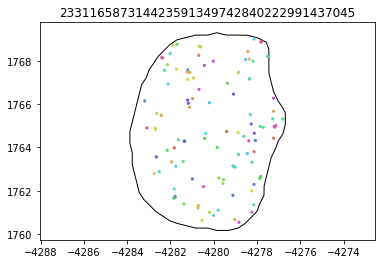

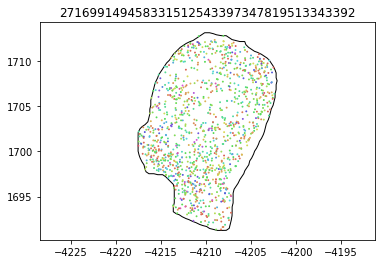

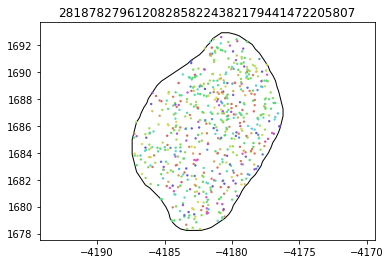

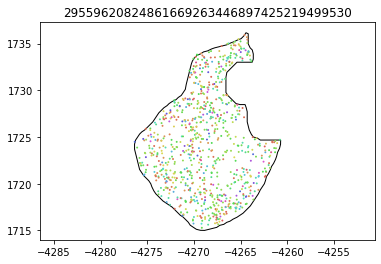

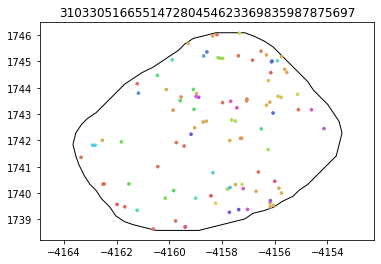

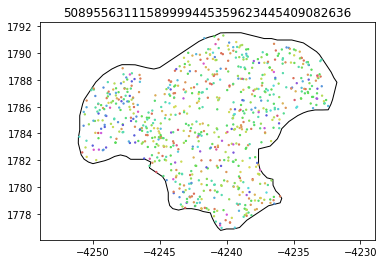

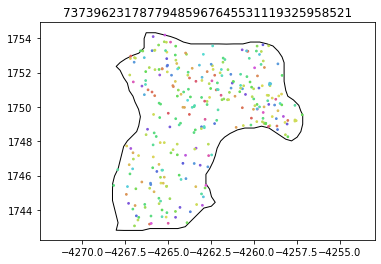

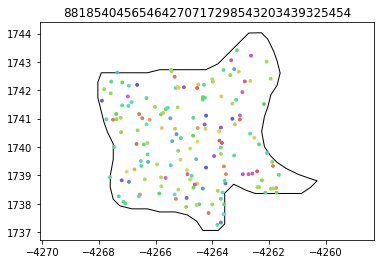

In [85]:
import importlib
importlib.reload(plot_utils)
plot_utils.plot_spot_cells(spots_subset, cells_subset, spot_colors='by_gene')

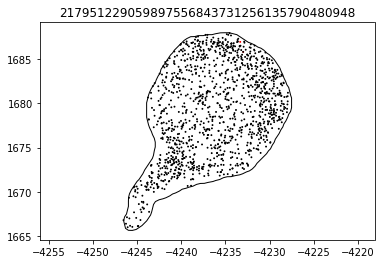

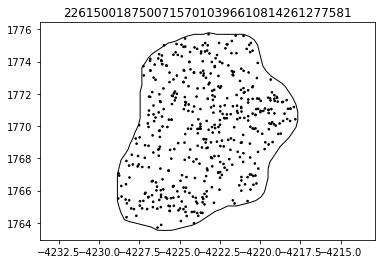

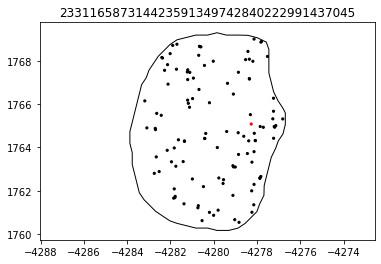

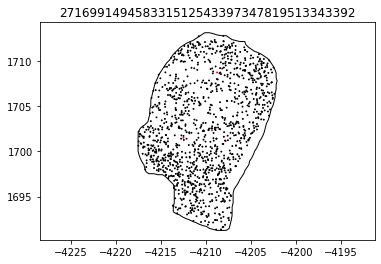

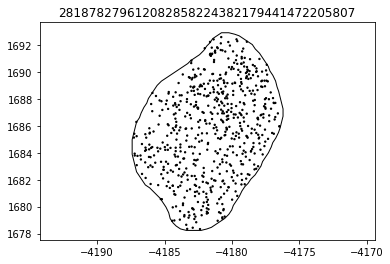

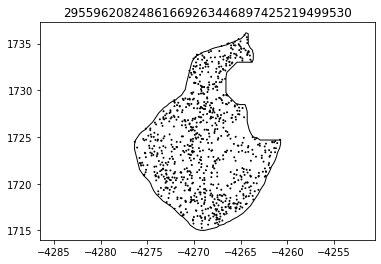

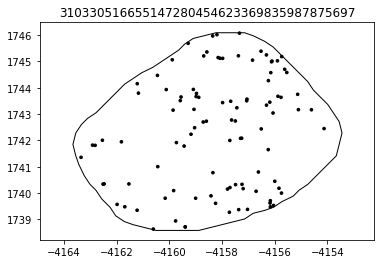

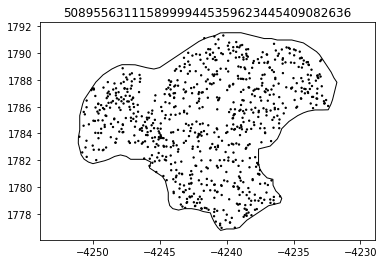

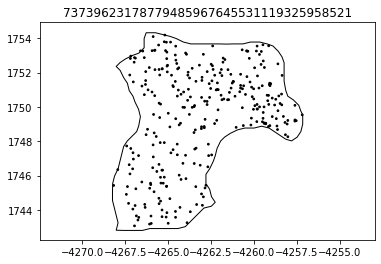

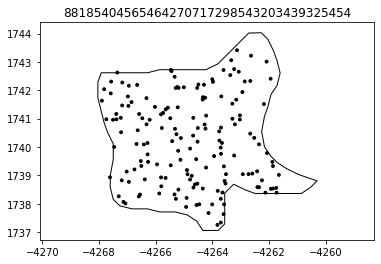

In [106]:
import importlib
importlib.reload(plot_utils)
spot_colors = {'Barx2':'r'}
plot_utils.plot_spot_cells(spots_subset, cells_subset, spot_colors=spot_colors)

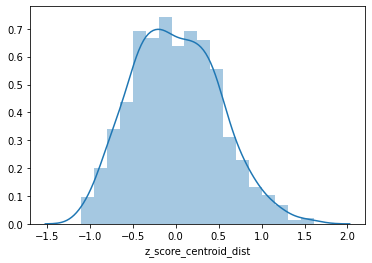

In [89]:
sns.distplot(
    centroid_dist_df['z_score_centroid_dist']
)
plt.show()
plt.close()

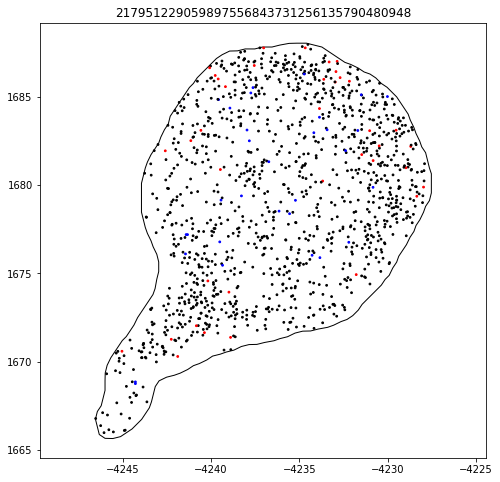

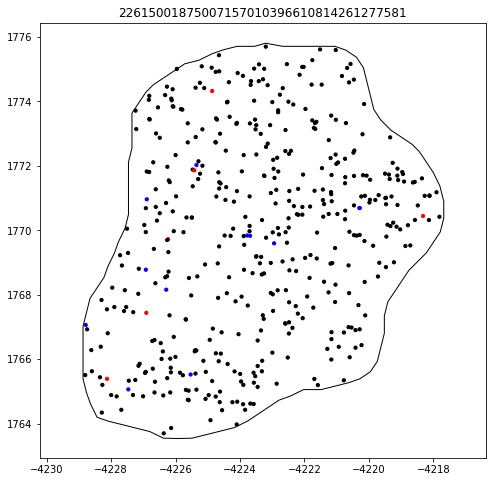

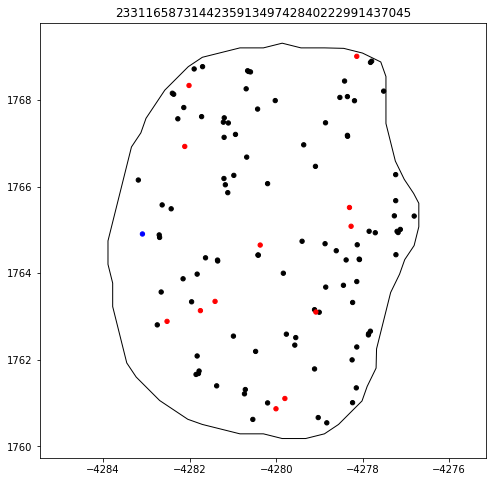

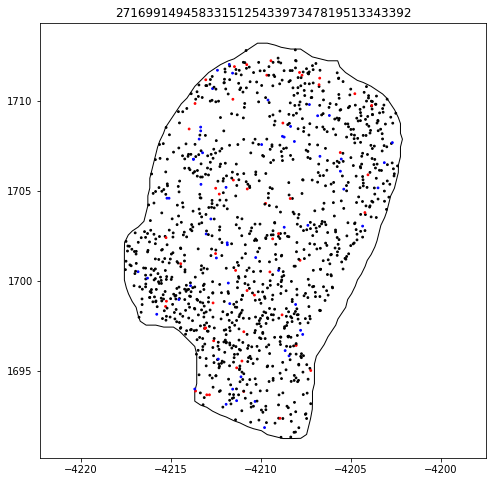

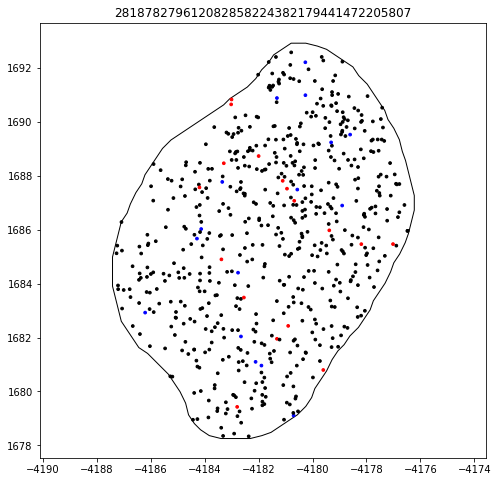

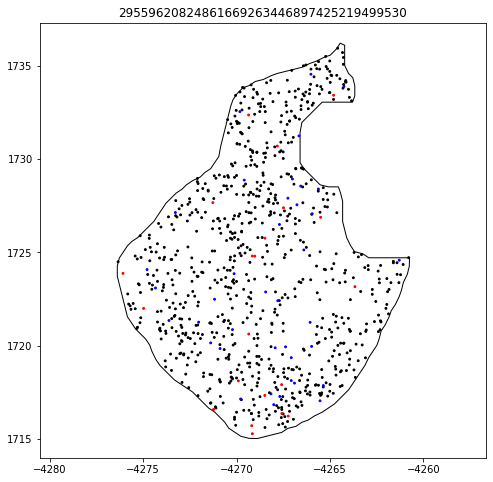

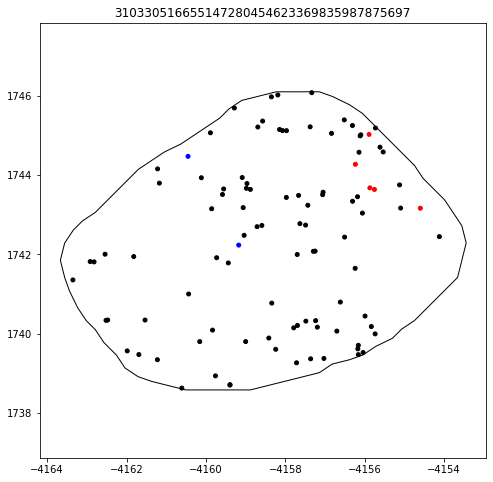

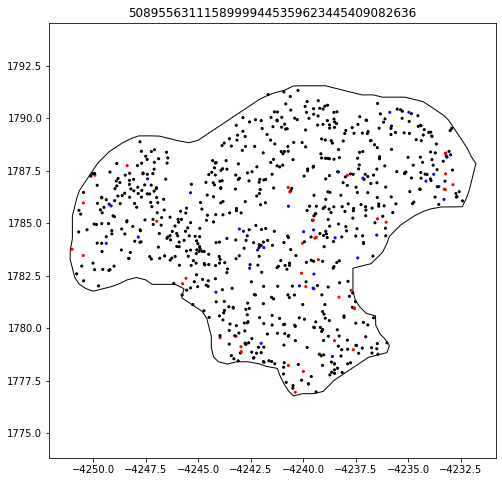

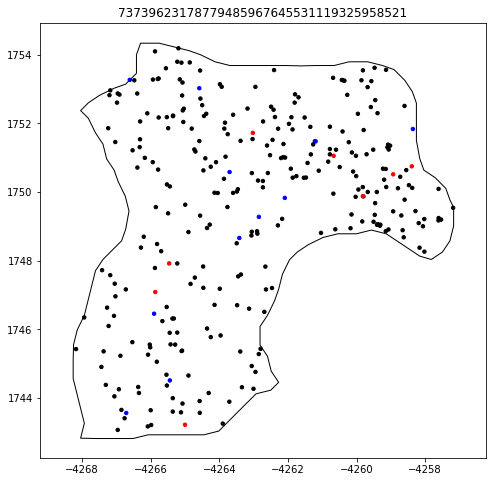

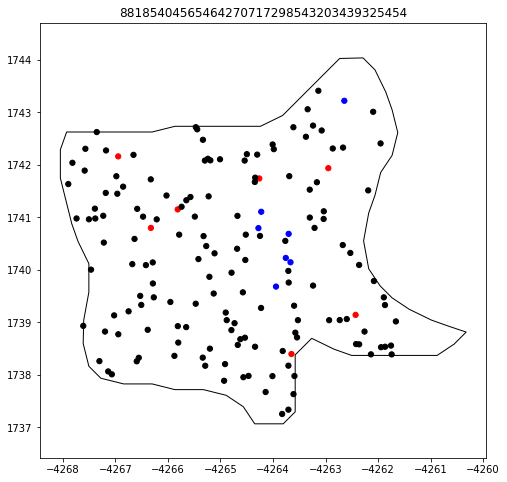

In [15]:
outer_genes = centroid_dist_df.loc[centroid_dist_df['z_score_centroid_dist'].gt(1),'target_molecule_name']
outer_colors = {g:'r' for g in outer_genes}

inner_genes = centroid_dist_df.loc[centroid_dist_df['z_score_centroid_dist'].lt(-1),'target_molecule_name']
inner_colors = {g:'b' for g in inner_genes}

inner_colors.update(outer_colors)

import importlib
importlib.reload(plot_utils)
plot_utils.plot_spot_cells(spots_subset, cells_subset, spot_colors=inner_colors)